# Project 1 Milestone 3
# DSC680-T301
# Ryan Krenke
# Due 10/5/25

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
#using read_csv from pd to read in csv file from local drive
meatdf = pd.read_csv("C:/Users/ryanr/dsc680/Project1/meat_consumption_worldwide.csv")

In [5]:
meatdf.head(10)

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,ARG,BEEF,KG_CAP,1990,55.369991
1,ARG,BEEF,KG_CAP,1991,51.637978
2,ARG,BEEF,KG_CAP,1992,50.789179
3,ARG,BEEF,KG_CAP,1993,51.464672
4,ARG,BEEF,KG_CAP,1994,48.375233
5,ARG,BEEF,KG_CAP,1995,43.485198
6,ARG,BEEF,KG_CAP,1996,44.002350
7,ARG,BEEF,KG_CAP,1997,44.639314
8,ARG,BEEF,KG_CAP,1998,41.428533
9,ARG,BEEF,KG_CAP,1999,45.534079


In [6]:
#using read_csv from pd to read in csv file from local drive
worlddf = pd.read_csv("C:/Users/ryanr/dsc680/Project1/world-data-2023.csv")

In [7]:
worlddf.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [8]:
#using read_csv from pd to read in csv file from local drive
codes = pd.read_csv("C:/Users/ryanr/dsc680/Project1/country_codes.csv")

In [9]:
codes.head()

,id,alpha2,alpha3,name
0,4,af,afg,Afghanistan
1,8,al,alb,Albania
2,12,dz,dza,Algeria
3,20,ad,and,Andorra
4,24,ao,ago,Angola


In [10]:
codes['alpha3'] = codes['alpha3'].str.upper()

In [11]:
codes['alpha2'] = codes['alpha2'].str.upper()

In [12]:
#creating dictionary of alpha3 to alpha2 values using zip
code_dict = dict(zip(codes['alpha3'], codes['alpha2']))

In [13]:
#updating LOCATION column using the dict
meatdf['LOCATION'] = meatdf['LOCATION'].map(code_dict).fillna(meatdf['LOCATION'])

In [14]:
meatdf.head(10)

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AR,BEEF,KG_CAP,1990,55.369991
1,AR,BEEF,KG_CAP,1991,51.637978
2,AR,BEEF,KG_CAP,1992,50.789179
3,AR,BEEF,KG_CAP,1993,51.464672
4,AR,BEEF,KG_CAP,1994,48.375233
5,AR,BEEF,KG_CAP,1995,43.485198
6,AR,BEEF,KG_CAP,1996,44.002350
7,AR,BEEF,KG_CAP,1997,44.639314
8,AR,BEEF,KG_CAP,1998,41.428533
9,AR,BEEF,KG_CAP,1999,45.534079


In [15]:
#keep only the thousand ton values for measure
meatdf2 = meatdf[meatdf['MEASURE'] == 'THND_TONNE']

In [16]:
#removing year 2026
meatdf3 = meatdf2[meatdf2['TIME'] != '2026']

In [17]:
#creating new df with grouped locations, subject, and measure with average values
meatdf4 = meatdf3.groupby(['LOCATION', 'SUBJECT', 'MEASURE'], as_index=False)['Value'].mean()

In [18]:
meatdf4.rename(columns={'LOCATION': 'Country'}, inplace=True)

In [19]:
meatdf4.head(10)

,Country,SUBJECT,MEASURE,Value
0,AR,BEEF,THND_TONNE,2457.346051
1,AR,PIG,THND_TONNE,349.886027
2,AR,POULTRY,THND_TONNE,1320.975966
3,AR,SHEEP,THND_TONNE,61.791903
4,AU,BEEF,THND_TONNE,732.013125
5,AU,PIG,THND_TONNE,526.137026
6,AU,POULTRY,THND_TONNE,903.571691
7,AU,SHEEP,THND_TONNE,282.754927
8,BD,BEEF,THND_TONNE,186.086066
9,BD,PIG,THND_TONNE,0.000309


In [20]:
#pivot df to new df, keeping country as index and flipping subject to columns with the values
meatdf5 = meatdf4.pivot(index='Country', columns='SUBJECT', values='Value').reset_index()

In [21]:
meatdf5.head(10)

SUBJECT,Country,BEEF,PIG,POULTRY,SHEEP
0,AR,2457.346051,349.886027,1320.975966,61.791903
1,AU,732.013125,526.137026,903.571691,282.754927
2,BD,186.086066,0.000309,180.818468,179.694668
3,BR,6745.524454,2531.627417,7052.134717,93.651321
4,BRICS,18152.636825,54234.183989,29503.004703,5000.862464
5,CA,986.741921,796.522891,1227.497373,33.099683
6,CH,166.979222,253.351474,116.161315,12.626060
7,CL,384.439556,330.969359,527.686014,10.758036
8,CN,6090.698192,45950.714778,15033.691165,3670.179672
9,CO,765.650387,207.462537,1033.135495,12.545963


In [22]:
#get rid of original Country column
worlddf2 = worlddf.drop('Country', axis=1)

In [23]:
#rename abbr (2 letter) to Country
worlddf3 = worlddf2.rename(columns={'Abbreviation':'Country'})

In [24]:
worlddf3.head(10)

,Density\n(P/Km2),Country,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,113.81,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",129.18,...,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",119.8,...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",118.06,...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


In [25]:
#using merge to combine the two dfs on country and keeping all other columns
meatdf6 = pd.merge(meatdf5, worlddf3, on="Country", how="outer")

In [26]:
meatdf6.head(10)

,Country,BEEF,PIG,POULTRY,SHEEP,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,AR,2457.346051,349.886027,1320.975966,61.791903,17,54.30%,"2,780,400","105,000",17.02,...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
1,AU,732.013125,526.137026,903.571691,282.754927,3,48.20%,"7,741,220","58,000",12.60,...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
2,BD,186.086066,0.000309,180.818468,179.694668,"1,265",70.60%,"148,460","221,000",18.18,...,71.80%,0.58,"167,310,838",59.00%,8.80%,33.40%,4.19%,"60,987,417",23.684994,90.356331
3,BR,6745.524454,2531.627417,7052.134717,93.651321,25,33.90%,"8,515,770","730,000",13.92,...,28.30%,2.15,"212,559,417",63.90%,14.20%,65.10%,12.08%,"183,241,641",-14.235004,-51.925280
4,BRICS,18152.636825,54234.183989,29503.004703,5000.862464,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CA,986.741921,796.522891,1227.497373,33.099683,4,6.90%,"9,984,670","72,000",10.10,...,14.60%,2.61,"36,991,981",65.10%,12.80%,24.50%,5.56%,"30,628,482",56.130366,-106.346771
6,CH,166.979222,253.351474,116.161315,12.626060,219,38.40%,"41,277","21,000",10.00,...,28.30%,4.30,"8,574,832",68.30%,10.10%,28.80%,4.58%,"6,332,428",46.818188,8.227512
7,CL,384.439556,330.969359,527.686014,10.758036,26,21.20%,"756,096","122,000",12.43,...,32.20%,2.59,"18,952,038",62.60%,18.20%,34.00%,7.09%,"16,610,135",-35.675147,-71.542969
8,CN,6090.698192,45950.714778,15033.691165,3670.179672,153,56.20%,"9,596,960","2,695,000",10.90,...,32.40%,1.98,"1,397,715,000",68.00%,9.40%,59.20%,4.32%,"842,933,962",35.861660,104.195397
9,CO,765.650387,207.462537,1033.135495,12.545963,46,40.30%,"1,138,910","481,000",14.88,...,18.30%,2.18,"50,339,443",68.80%,14.40%,71.20%,9.71%,"40,827,302",4.570868,-74.297333


In [27]:
meatdf7 = meatdf6.dropna(subset=['Country'])

In [28]:
#creating dictionary of alpha3 to alpha2 values using zip
code_dict2 = dict(zip(codes['alpha2'], codes['name']))

In [29]:
#updating LOCATION column using the dict
meatdf7['Country'] = meatdf7['Country'].map(code_dict2).fillna(meatdf7['Country'])

C:\Users\ryanr\AppData\Local\Temp\ipykernel_29464\3756901078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meatdf7['Country'] = meatdf7['Country'].map(code_dict2).fillna(meatdf7['Country'])


In [30]:
meatdf7.head(10)

,Country,BEEF,PIG,POULTRY,SHEEP,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Argentina,2457.346051,349.886027,1320.975966,61.791903,17,54.30%,"2,780,400","105,000",17.02,...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
1,Australia,732.013125,526.137026,903.571691,282.754927,3,48.20%,"7,741,220","58,000",12.60,...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
2,Bangladesh,186.086066,0.000309,180.818468,179.694668,"1,265",70.60%,"148,460","221,000",18.18,...,71.80%,0.58,"167,310,838",59.00%,8.80%,33.40%,4.19%,"60,987,417",23.684994,90.356331
3,Brazil,6745.524454,2531.627417,7052.134717,93.651321,25,33.90%,"8,515,770","730,000",13.92,...,28.30%,2.15,"212,559,417",63.90%,14.20%,65.10%,12.08%,"183,241,641",-14.235004,-51.925280
4,BRICS,18152.636825,54234.183989,29503.004703,5000.862464,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Canada,986.741921,796.522891,1227.497373,33.099683,4,6.90%,"9,984,670","72,000",10.10,...,14.60%,2.61,"36,991,981",65.10%,12.80%,24.50%,5.56%,"30,628,482",56.130366,-106.346771
6,Switzerland,166.979222,253.351474,116.161315,12.626060,219,38.40%,"41,277","21,000",10.00,...,28.30%,4.30,"8,574,832",68.30%,10.10%,28.80%,4.58%,"6,332,428",46.818188,8.227512
7,Chile,384.439556,330.969359,527.686014,10.758036,26,21.20%,"756,096","122,000",12.43,...,32.20%,2.59,"18,952,038",62.60%,18.20%,34.00%,7.09%,"16,610,135",-35.675147,-71.542969
8,China,6090.698192,45950.714778,15033.691165,3670.179672,153,56.20%,"9,596,960","2,695,000",10.90,...,32.40%,1.98,"1,397,715,000",68.00%,9.40%,59.20%,4.32%,"842,933,962",35.861660,104.195397
9,Colombia,765.650387,207.462537,1033.135495,12.545963,46,40.30%,"1,138,910","481,000",14.88,...,18.30%,2.18,"50,339,443",68.80%,14.40%,71.20%,9.71%,"40,827,302",4.570868,-74.297333


In [90]:
#sending to local drive to inspect better
#meatdf7.to_csv("C:/Users/ryanr/dsc680/Project1/meatdf77.csv")

In [ ]:
#went back to just data that has meat consumption data - deleted rows in file on local drive

In [31]:
#using read_csv from pd to read in csv file from local drive
meatdf8 = pd.read_csv("C:/Users/ryanr/dsc680/Project1/meatdf77.csv")

In [32]:
#removing columns not needed using drop
meatdf9 = meatdf8.drop(['Armed Forces size', 'Calling Code', 'Capital/Major City', 'Currency-Code',
                        'Largest city', 'Official language', 'Latitude', 'Longitude', 'Minimum wage'], axis=1)

In [33]:
meatdf9.dtypes

Unnamed: 0                                     int64
Country                                       object
BEEF                                         float64
PIG                                          float64
POULTRY                                      float64
SHEEP                                        float64
Density\n(P/Km2)                              object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Birth Rate                                   float64
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [34]:
#create variable with all object columns except Country
objectcolumns = meatdf9.select_dtypes(include='object').columns.drop('Country')
#loop through the object columns, strip characters, make string type and then remove, then make them all numeric
for col in objectcolumns:
    meatdf9[col] = (meatdf9[col].replace({r'[$,%]': '', r',': ''}, regex=True).astype(str).str.strip())
    meatdf9[col] = pd.to_numeric(meatdf9[col], errors='coerce')

In [35]:
meatdf9.dtypes

Unnamed: 0                                     int64
Country                                       object
BEEF                                         float64
PIG                                          float64
POULTRY                                      float64
SHEEP                                        float64
Density\n(P/Km2)                               int64
Agricultural Land( %)                        float64
Land Area(Km2)                                 int64
Birth Rate                                   float64
Co2-Emissions                                  int64
CPI                                          float64
CPI Change (%)                               float64
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price                               float64
GDP                                            int64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      f

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# selecting X values (comparisons) by taking the values of all rows and columns 7-30
X = meatdf9.iloc[:, 6:30].values 
# selecting the y values (target) taking the values of all rows and the 3rd column (BEEF)
y = meatdf9.iloc[:, 2].values

In [38]:
# format for creating test and train data from X and y values, 
    #using train_test_split function, test_size of 0.2 is 20% test, random_state to control
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.linear_model import LinearRegression #importing linear regression model library

In [40]:
regressor = LinearRegression() #creating regressor variable to run the linear regression function
regressor.fit(X_train, y_train) # using fit to train the data

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test) #creating y_pred variable which uses predict to predict the test results based on the model
y_pred #predicted y values

array([10468.36094064,  1045.16650669,   298.82917379,  3721.33005707,
         479.50331957,  -583.40229882,  -238.23425612,  -437.28479169,
       -6841.05716856])

In [42]:
# importing librarys to calculate model evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae

In [43]:
print("r2 score for linear TEST set:", r2_score(y_test, y_pred)) #using r2_score function on test and predicted values
rmselinear = sqrt(mean_squared_error(y_pred, y_test)) #calculating sq rt of mse on test and predicted values
print("RMSE score for linear TEST set:",rmselinear)
maelinear = mae(y_test, y_pred) #using mae function on test and predicted values
print("MAE score for linear TEST set:",maelinear)

r2 score for linear TEST set: -2.724387263054853
RMSE score for linear TEST set: 6944.099052449307
MAE score for linear TEST set: 3731.746436891279


In [44]:
#Not surprising, using all the variables is not a good predictor. Need to do some correlation analysis first:

In [45]:
corr_matrix = meatdf9.corr(numeric_only=True)

In [46]:
import seaborn as sns

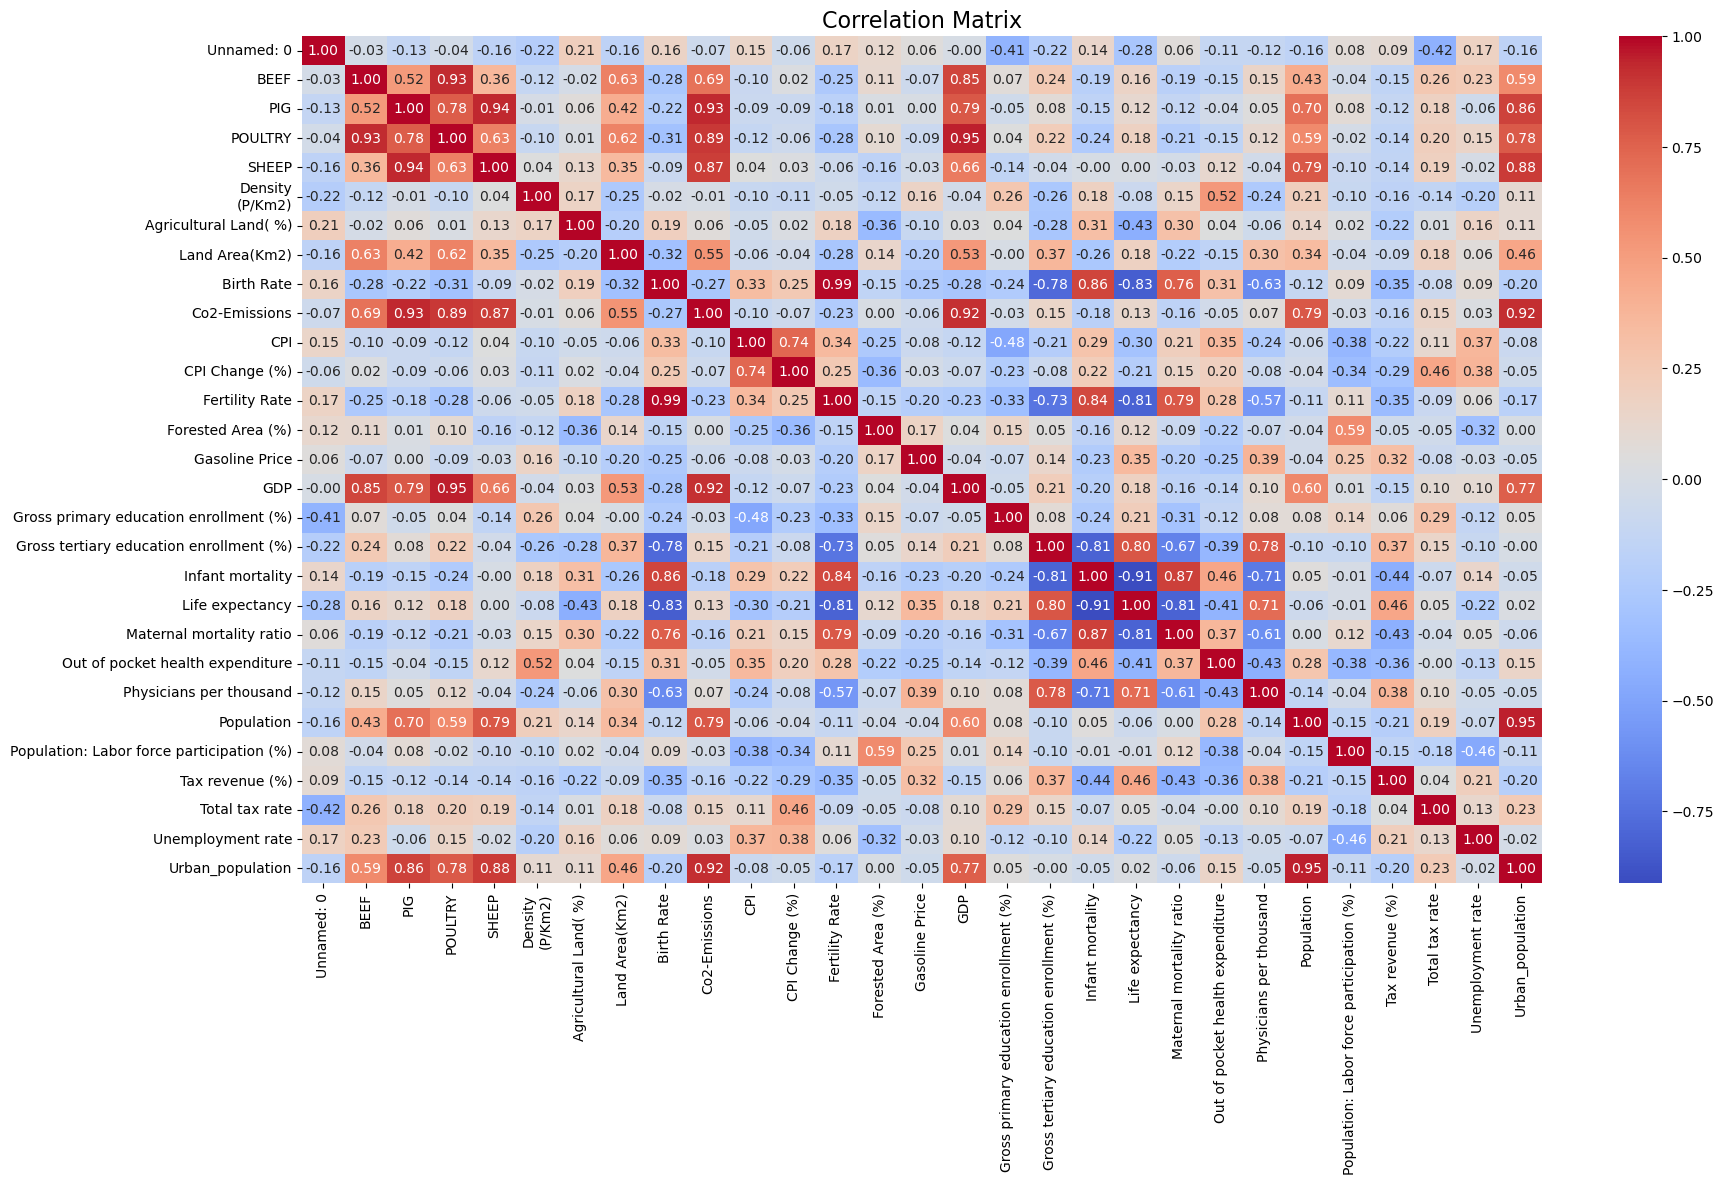

In [47]:
#using seaborn to plot correlation matrix
plt.figure(figsize=(20, 11))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
#Land area, CO2 emissions, GDP, Population, Urban Pop highest correlation

In [ ]:
#linear regression for Beef with just 5 correlated features

In [49]:
# selecting X values (comparisons) by calling specific columns
X2 = meatdf9[['Land Area(Km2)', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']]
# selecting the y values (target) by calling BEEF column
y2 = meatdf9['BEEF']

In [50]:
# format for creating test and train data from X and y values, 
    #using train_test_split function, test_size of 0.2 is 20% test, random_state to control
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

In [51]:
regressor = LinearRegression() #creating regressor variable to run the linear regression function
regressor.fit(X2_train, y2_train) # using fit to train the data

LinearRegression()

In [53]:
y2_pred = regressor.predict(X2_test) #creating y_pred variable which uses predict to predict the test results based on the model
y2_pred #predicted y values

array([3069.21772253,  545.40317158,  962.10248102,  230.22343803,
          8.35106542,  181.06807632,  286.5910119 ,  355.86855586,
        297.33112303])

In [55]:
print("r2 score for linear TEST set:", r2_score(y2_test, y2_pred)) #using r2_score function on test and predicted values
rmselinear = sqrt(mean_squared_error(y2_pred, y2_test)) #calculating sq rt of mse on test and predicted values
print("RMSE score for linear TEST set:",rmselinear)
maelinear = mae(y2_test, y2_pred) #using mae function on test and predicted values
print("MAE score for linear TEST set:",maelinear)

r2 score for linear TEST set: 0.6063976213398186
RMSE score for linear TEST set: 1267.0130266831702
MAE score for linear TEST set: 658.9371032309817


In [ ]:
#linear regression for beef ^

In [62]:
# selecting X values (comparisons) by calling specific columns
X3 = meatdf9[['Land Area(Km2)', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']]
# selecting the y values (target) by calling PIG column
y3 = meatdf9['PIG']
# format for creating test and train data from X and y values, 
    #using train_test_split function, test_size of 0.2 is 20% test, random_state to control
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 2)

In [63]:
regressor = LinearRegression() #creating regressor variable to run the linear regression function
regressor.fit(X3_train, y3_train) # using fit to train the data

LinearRegression()

In [64]:
y3_pred = regressor.predict(X3_test) #creating y_pred variable which uses predict to predict the test results based on the model

In [65]:
print("r2 score for linear TEST set:", r2_score(y3_test, y3_pred)) #using r2_score function on test and predicted values
rmselinear = sqrt(mean_squared_error(y3_pred, y3_test)) #calculating sq rt of mse on test and predicted values
print("RMSE score for linear TEST set:",rmselinear)
maelinear = mae(y3_test, y3_pred) #using mae function on test and predicted values
print("MAE score for linear TEST set:",maelinear)

r2 score for linear TEST set: -9.987700214918858
RMSE score for linear TEST set: 9117.287321339803
MAE score for linear TEST set: 3657.7975920773574


In [68]:
# selecting X values (comparisons) by calling specific columns
X4 = meatdf9[['Land Area(Km2)', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']]
# selecting the y values (target) by calling PIG column
y4 = meatdf9['POULTRY']
# format for creating test and train data from X and y values, 
    #using train_test_split function, test_size of 0.2 is 20% test, random_state to control
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 2)

In [69]:
regressor = LinearRegression() #creating regressor variable to run the linear regression function
regressor.fit(X4_train, y4_train) # using fit to train the data

LinearRegression()

In [70]:
y4_pred = regressor.predict(X4_test)

In [71]:
print("r2 score for linear TEST set:", r2_score(y4_test, y4_pred)) #using r2_score function on test and predicted values
rmselinear = sqrt(mean_squared_error(y4_pred, y4_test)) #calculating sq rt of mse on test and predicted values
print("RMSE score for linear TEST set:",rmselinear)
maelinear = mae(y4_test, y4_pred) #using mae function on test and predicted values
print("MAE score for linear TEST set:",maelinear)

r2 score for linear TEST set: -0.1010753660945054
RMSE score for linear TEST set: 4813.061956917845
MAE score for linear TEST set: 2190.25784462737


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [86]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", Ridge(alpha=1.0, random_state=4))])

In [96]:
pipe.fit(X3_train, y3_train)
y3_pred = pipe.predict(X3_test)

In [98]:
print("R2:", r2_score(y3_test, pred))
print("RMSE:", mean_squared_error(y3_test, y3_pred, squared=False))
print("MAE:", mae(y3_test, y3_pred))

R2: -11.85633581025448
RMSE: 9862.13275569455
MAE: 3817.1570002173967


In [99]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
randomforest = RandomForestRegressor(n_estimators=700, random_state=5, min_samples_leaf=2, max_features="sqrt")
randomforest.fit(X3_train, y3_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=700,
                      random_state=5)

In [124]:
y3_pred = randomforest.predict(X3_test)

In [125]:
print("R2:", r2_score(y3_test, y3_pred))
print("RMSE:", mean_squared_error(y3_test, y3_pred, squared=False))
print("MAE:", mae(y3_test, y3_pred))

R2: 0.17698649567205005
RMSE: 2495.2595195906665
MAE: 1778.858218618452


In [ ]:
#random forest for pork ^

In [126]:
randomforest2 = RandomForestRegressor(n_estimators=700, random_state=5, min_samples_leaf=2, max_features="sqrt")
randomforest2.fit(X4_train, y4_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=700,
                      random_state=5)

In [127]:
y4_pred = randomforest2.predict(X4_test)

In [128]:
print("R2:", r2_score(y4_test, y4_pred))
print("RMSE:", mean_squared_error(y4_test, y4_pred, squared=False))
print("MAE:", mae(y4_test, y4_pred))

R2: 0.5223769980917004
RMSE: 3169.9728743291366
MAE: 1522.5896464478367


In [ ]:
#random forest for poultry ^

In [169]:
#updated csv offline to include only countries WITHOUT meat consumption values
#using read_csv from pd to read in csv file from local drive
meatdf10 = pd.read_csv("C:/Users/ryanr/dsc680/Project1/meatdf10.csv")

In [170]:
meatdf10.head(10)

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.10%,"652,230",32.49,"8,672",149.9,2.30%,4.47,2.10%,...,638.0,$0.43,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273"
1,Albania,105,43.10%,"28,748",11.78,"4,536",119.05,1.40%,1.62,28.10%,...,15.0,$1.12,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593"
2,Andorra,164,40.00%,468,7.20,469,NaN,NaN,1.27,34.00%,...,NaN,$6.63,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873"
3,Angola,26,47.50%,"1,246,700",40.73,"34,693",261.73,17.10%,5.52,46.30%,...,241.0,$0.71,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025"
4,Antigua and Barbuda,223,20.50%,443,15.33,557,113.81,1.20%,1.99,22.30%,...,42.0,$3.04,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800"
5,Armenia,104,58.90%,"29,743",13.99,"5,156",129.18,1.40%,1.76,11.70%,...,26.0,$0.66,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848"
6,Austria,109,32.40%,"83,871",9.70,"61,448",118.06,1.50%,1.47,46.90%,...,5.0,NaN,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416"
7,Azerbaijan,123,57.70%,"86,600",14.00,"37,620",156.32,2.60%,1.73,14.10%,...,26.0,$0.47,78.60%,3.45,"10,023,318",66.50%,13.00%,40.70%,5.51%,"5,616,165"
8,Bahamas,39,1.40%,"13,880",13.97,"1,786",116.22,2.50%,1.75,51.40%,...,70.0,$5.25,27.80%,1.94,"389,482",74.60%,14.80%,33.80%,10.36%,"323,784"
9,Bahrain,"2,239",11.10%,765,13.99,"31,694",117.59,2.10%,1.99,0.80%,...,14.0,NaN,25.10%,0.93,"1,501,635",73.40%,4.20%,13.80%,0.71%,"1,467,109"


In [173]:
#checking for any na values in columns after having issues with predictor sets - all good after updates below
meatdf10.isna().any()

Country                                      False
Density\n(P/Km2)                             False
Agricultural Land( %)                         True
Land Area(Km2)                               False
Birth Rate                                    True
Co2-Emissions                                False
CPI                                           True
CPI Change (%)                                True
Fertility Rate                                True
Forested Area (%)                             True
Gasoline Price                                True
GDP                                          False
Gross primary education enrollment (%)        True
Gross tertiary education enrollment (%)       True
Infant mortality                              True
Life expectancy                               True
Maternal mortality ratio                      True
Minimum wage                                  True
Out of pocket health expenditure              True
Physicians per thousand        

In [159]:
#for loop to change specified columns to numeric types
for col in ['Land Area(Km2)', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']:
    meatdf10[col] = pd.to_numeric(meatdf10[col], errors="coerce")

In [178]:
#removing %, commas, $, blanks, and # due to having issues with predictor sets
meatdf10 = meatdf10.replace({'%': '', ',': '', r'\$': '', r'\s+$': '', ' ': '', r'#+': np.nan}, regex=True)

In [179]:
#creating beef test predictors based on the feature columns
X_beef = meatdf10[['Land Area(Km2)', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']]

In [180]:
#creating pig test predictors based on the feature columns
X_pig = meatdf10[['Land Area(Km2)', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']]

In [181]:
#creating poultry test predictors based on the feature columns
X_poultry = meatdf10[['Land Area(Km2)', 'Co2-Emissions', 'GDP', 'Population', 'Urban_population']]

In [182]:
#creating new columns in meatdf10 calling previous models and predictors
meatdf10['Pred_BEEF'] = regressor.predict(X_beef)
meatdf10['Pred_PIG'] = randomforest.predict(X_pig)
meatdf10['Pred_POULTRY'] = randomforest2.predict(X_poultry)

In [183]:
meatdf10.head(10)

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Pred_BEEF,Pred_PIG,Pred_POULTRY
0,Afghanistan,60,58.10,652230,32.49,8672,149.9,2.30,4.47,2.10,...,0.28,38041754,48.90,9.30,71.40,11.12,9797273,-44.954922,97.118184,95.393107
1,Albania,105,43.10,28748,11.78,4536,119.05,1.40,1.62,28.10,...,1.20,2854191,55.70,18.60,36.60,12.33,1747593,30.507335,102.621722,81.221996
2,Andorra,164,40.00,468,7.20,469,NaN,NaN,1.27,34.00,...,3.33,77142,NaN,NaN,NaN,NaN,67873,-8.776651,102.621722,81.221996
3,Angola,26,47.50,1246700,40.73,34693,261.73,17.10,5.52,46.30,...,0.21,31825295,77.50,9.20,49.10,6.89,21061025,665.867877,94.258316,288.697620
4,AntiguaandBarbuda,223,20.50,443,15.33,557,113.81,1.20,1.99,22.30,...,2.76,97118,NaN,16.50,43.00,NaN,23800,-10.614109,102.621722,81.221996
5,Armenia,104,58.90,29743,13.99,5156,129.18,1.40,1.76,11.70,...,4.40,2957731,55.60,20.90,22.60,16.99,1869848,36.040363,102.621722,81.221996
6,Austria,109,32.40,83871,9.70,61448,118.06,1.50,1.47,46.90,...,5.17,8877067,60.70,25.40,51.40,4.67,5194416,-67.005773,154.307408,335.992091
7,Azerbaijan,123,57.70,86600,14.00,37620,156.32,2.60,1.73,14.10,...,3.45,10023318,66.50,13.00,40.70,5.51,5616165,116.956448,121.049599,108.176737
8,Bahamas,39,1.40,13880,13.97,1786,116.22,2.50,1.75,51.40,...,1.94,389482,74.60,14.80,33.80,10.36,323784,-3.272775,102.621722,81.221996
9,Bahrain,2239,11.10,765,13.99,31694,117.59,2.10,1.99,0.80,...,0.93,1501635,73.40,4.20,13.80,0.71,1467109,31.929135,111.695183,103.941718


In [184]:
#send to local drive to inspect
meatdf10.to_csv("C:/Users/ryanr/dsc680/Project1/meatdfpredicted.csv")

In [188]:
#combined predicted and meatdf7 into meatdf11 offline (added predicted values and countries under meat cons values)

In [189]:
meatdf11 = pd.read_csv("C:/Users/ryanr/dsc680/Project1/meatdf11.csv")

In [193]:
#removing US country
meatdf12 = meatdf11[meatdf11['Country'] != 'United States of America']

In [206]:
#removing china country
meatdf12 = meatdf12[meatdf11['Country'] != 'China']

C:\Users\ryanr\AppData\Local\Temp\ipykernel_29464\1183345321.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meatdf12 = meatdf12[meatdf11['Country'] != 'China']


In [214]:
#updating some country names
meatdf12['Country'] = meatdf12['Country'].replace({'Russian Federation': 'Russia', 'CongoDemocraticRepublicofthe': 'Congo', 
                                                   'UnitedKingdomofGreatBritainandNorthernIreland': 'United Kingdom', 
                                                  'Iran, Islamic Republic of': 'Iran'})

In [208]:
#creating variable of 10 largest beef values by country
beefdf = meatdf12.nlargest(10, "BEEF")[["Country", "BEEF"]]

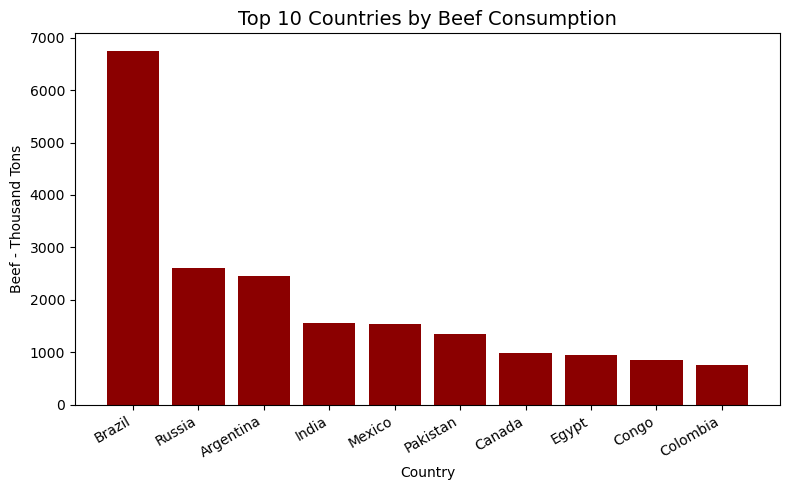

In [218]:
#creating bar chart based on this variable
plt.figure(figsize=(8,5))
plt.bar(beefdf["Country"], beefdf["BEEF"], color="darkred")
plt.title("Top 10 Countries by Beef Consumption", fontsize=14)
plt.ylabel("Beef - Thousand Tons")
plt.xlabel("Country")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [210]:
#creating variable of 10 largest pork values by country
pigdf = meatdf12.nlargest(10, "PIG")[["Country", "PIG"]]

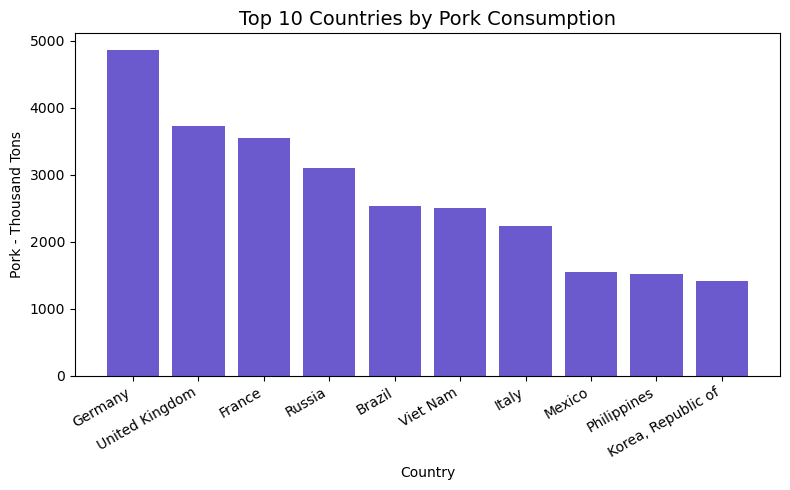

In [219]:
plt.figure(figsize=(8,5))
plt.bar(pigdf["Country"], pigdf["PIG"], color="slateblue")
plt.title("Top 10 Countries by Pork Consumption", fontsize=14)
plt.ylabel("Pork - Thousand Tons")
plt.xlabel("Country")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [215]:
#creating variable of 10 largest poultry values by country
poultrydf = meatdf12.nlargest(10, "POULTRY")[["Country", "POULTRY"]]

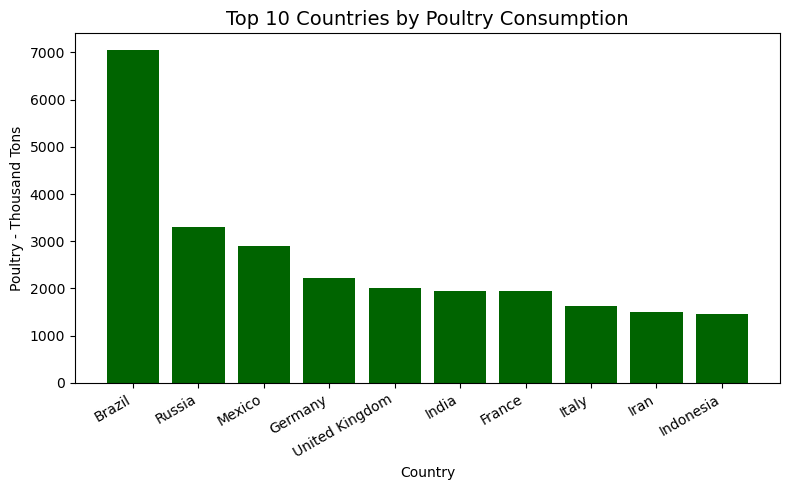

In [220]:
plt.figure(figsize=(8,5))
plt.bar(poultrydf["Country"], poultrydf["POULTRY"], color="darkgreen")
plt.title("Top 10 Countries by Poultry Consumption", fontsize=14)
plt.ylabel("Poultry - Thousand Tons")
plt.xlabel("Country")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()